In [63]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
df_train = pd.read_csv('../datasets/cleaned_traindata_to_visualize.csv',keep_default_na=False)

In [64]:
pd.options.display.max_columns = 999  # Allos us to display all columns
df_train.columns = df_train.columns.str.lower() # column names to lower case

In [65]:
df_train.shape, df_test.shape  # The differnece in # of columns should be neighborhood columns

((2051, 81), (878, 169))

With no Nulls, and no object (string) data, we can look at distributions, correlations to the target, and outliers.
### First, we're going to look at the correlations to saleprice.
There is a lot of data here, and a limited amount of time, so we want to 
focus our efforts on the data points that we're most likely to include in 
any potention models.


In [66]:
df_train.corr()[['saleprice']].sort_values(['saleprice'], 
                                           ascending=False
                                          ).head(10)                # gives you everything corelated to apps

,saleprice
saleprice,1.000000
overall qual,0.800207
gr liv area,0.697038
garage area,0.649897
garage cars,0.647781
total bsmt sf,0.629303
1st flr sf,0.618486
bsmt qual,0.612188
year built,0.571849
garage finish,0.557839


This is going to be a SUPER long list with over 170 features to consider, and strong neagtive and positive correlations to consider.
To make this task easier, we're going to find the absolute values of our correlations, and then sort highest to lowest.
We don't care if the correlation is positive or negative, we really just care about how close it is to 1.


In [67]:
corrs = df_train.corr()[['saleprice']].sort_values(['saleprice'], ascending=True)  #.index.tolist() 
# gives you every feature and its corelation to salesprice in terms of absolute value, both positive and negative
corrs.rename(columns={'saleprice':'corr_1'},inplace=True)
# calling the column corr_1 because we're going to try to deal with outliers and then retake the correlation 

corrs#.head(11)
#with help from https://www.marsja.se/renaming-columns-in-pandas-dataframe/#:~:text=So%20how%20do%20you%20change,columns%20%3D%20list_of_new_names%20.


,corr_1
pid,-0.255052
fence,-0.159060
enclosed porch,-0.135656
kitchen abvgr,-0.125444
overall cond,-0.097019
ms subclass,-0.087335
id,-0.051398
misc feature,-0.048331
bsmt half bath,-0.045290
low qual fin sf,-0.041594


### Next, we're just going to plot those correlations and look for potential outliers


C:\Users\benro\anaconda3\lib\site-packages\seaborn\axisgrid.py:1670: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure(figsize=(height, height))


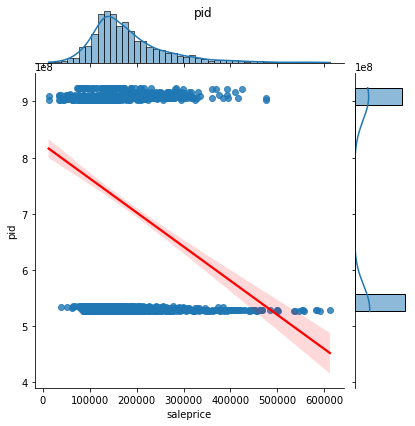

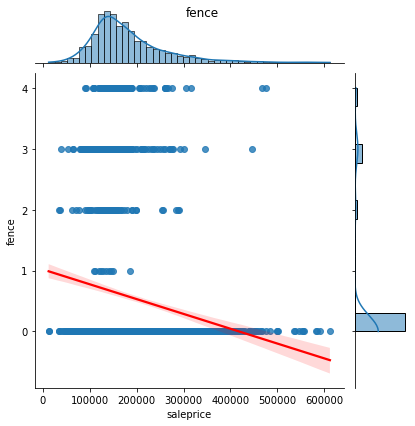

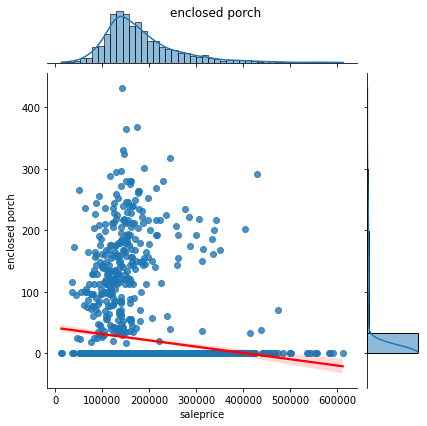

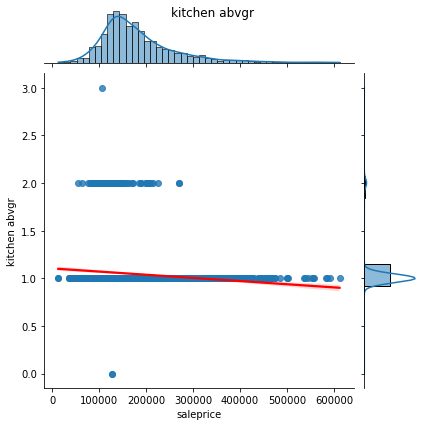

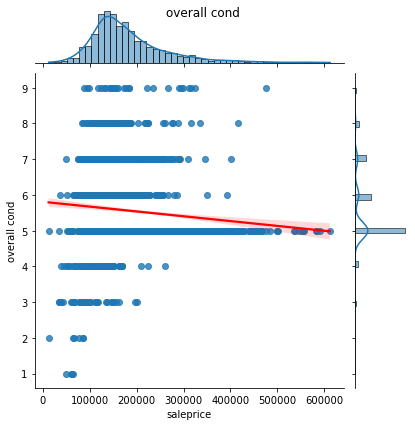

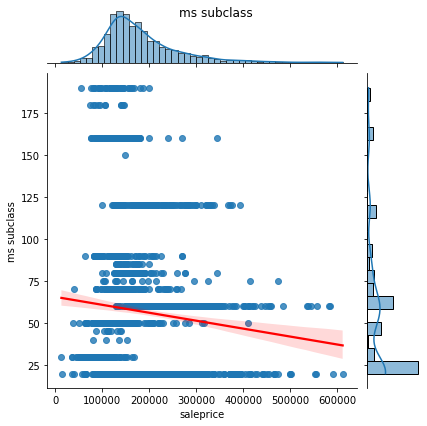

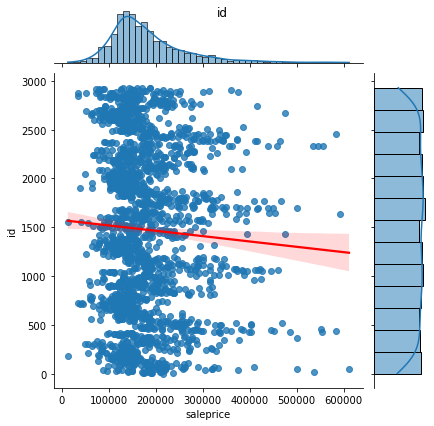

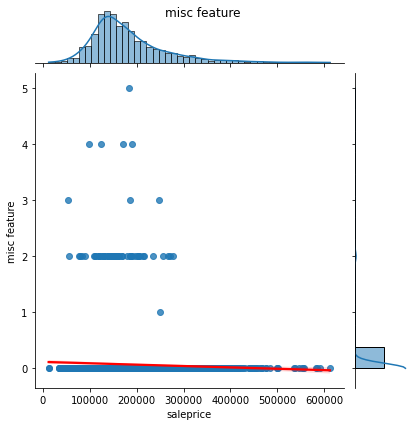

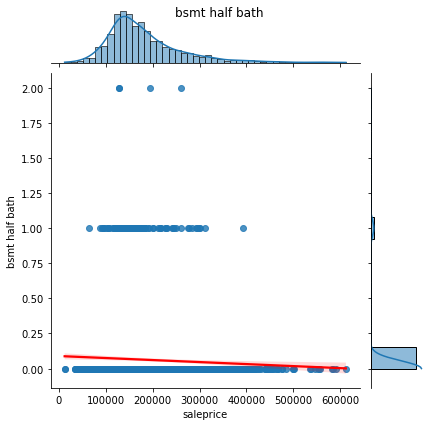

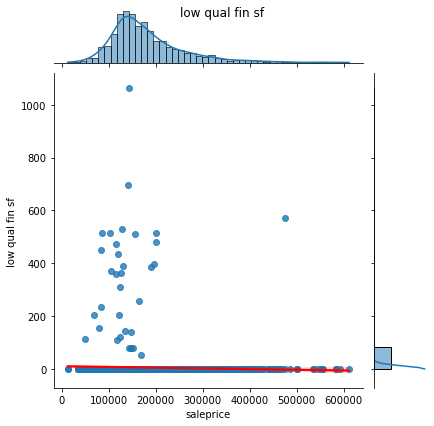

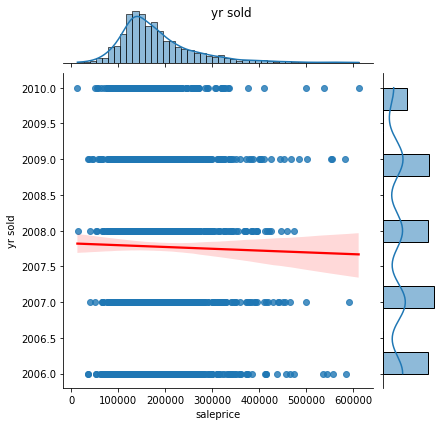

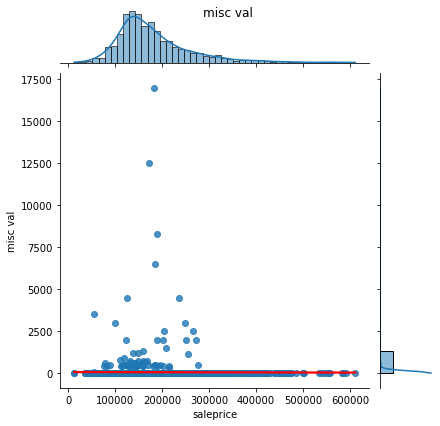

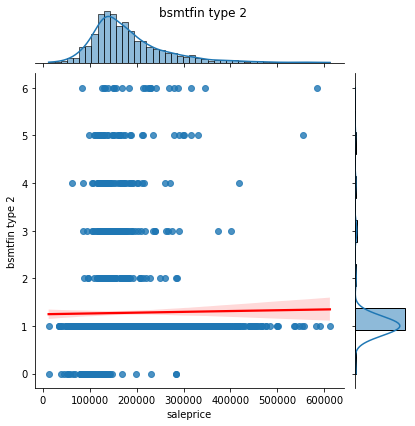

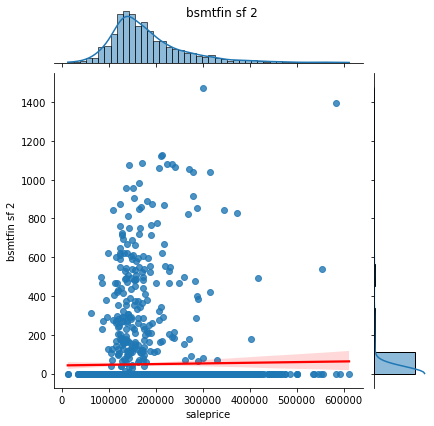

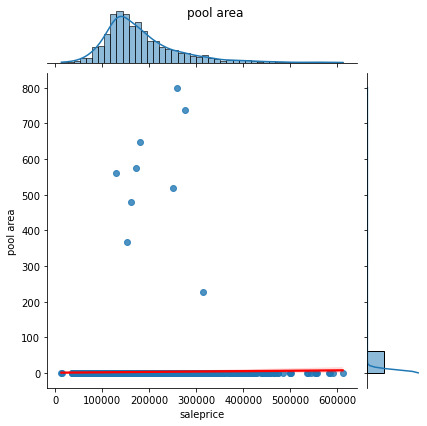

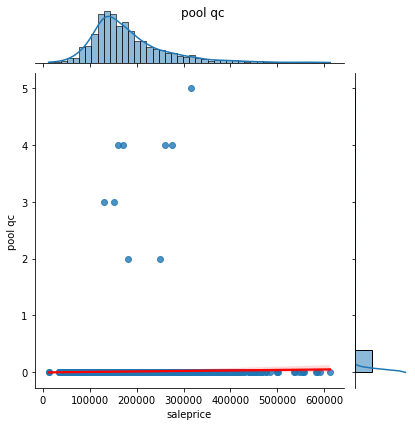

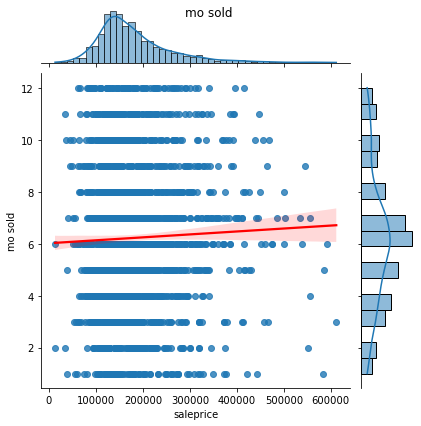

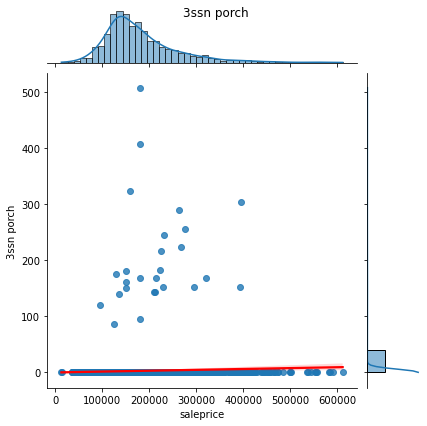

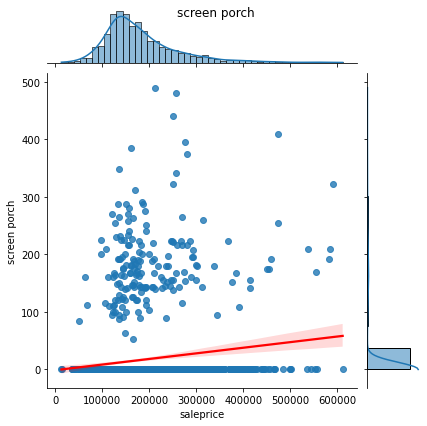

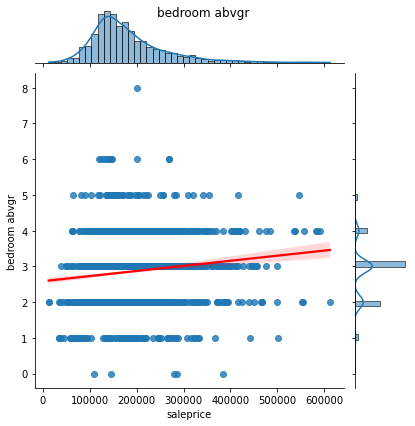

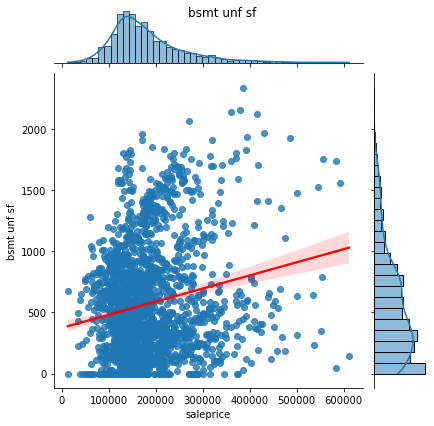

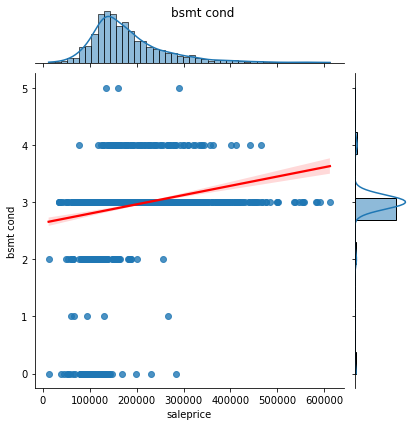

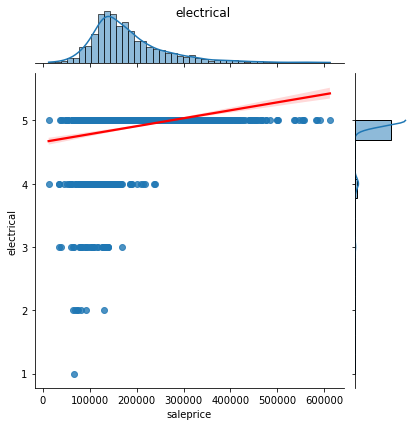

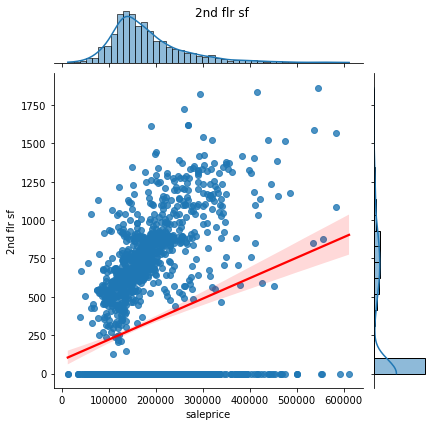

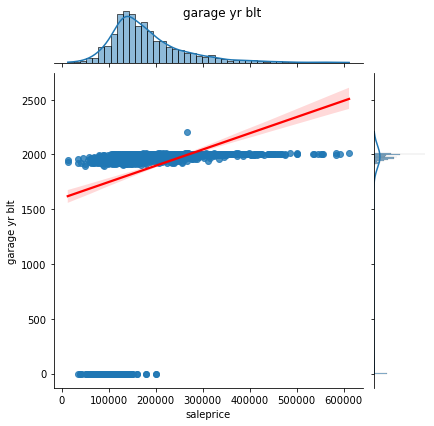

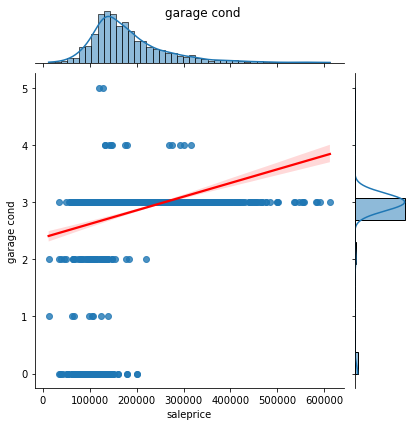

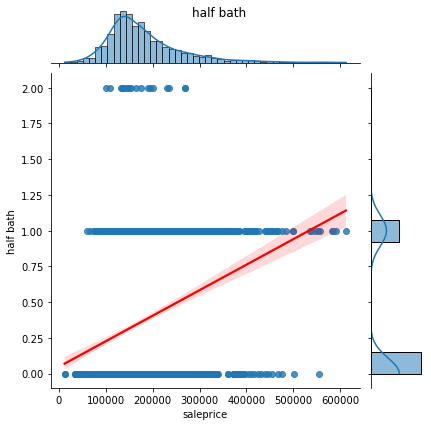

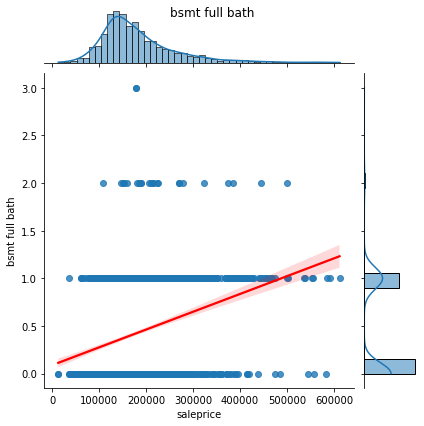

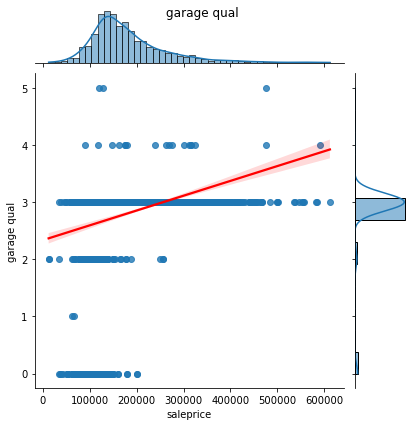

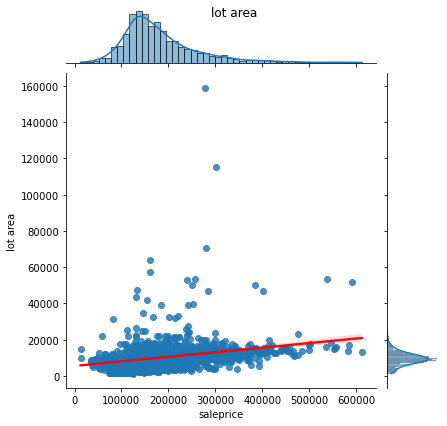

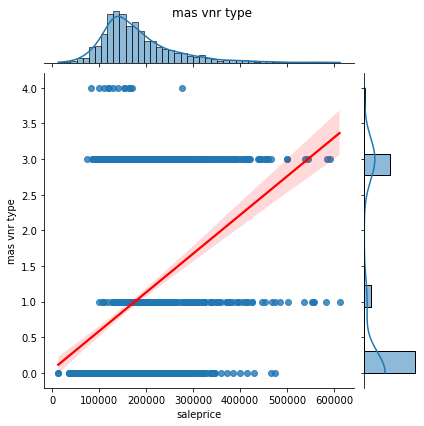

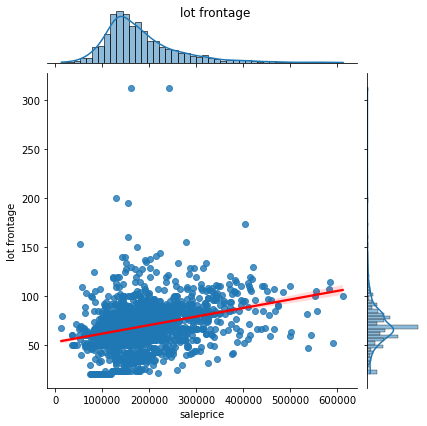

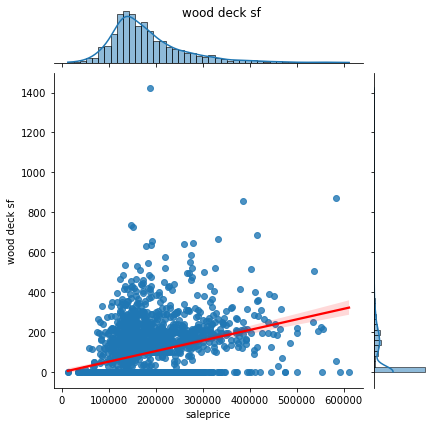

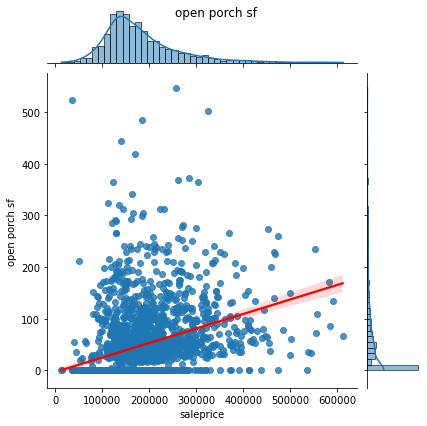

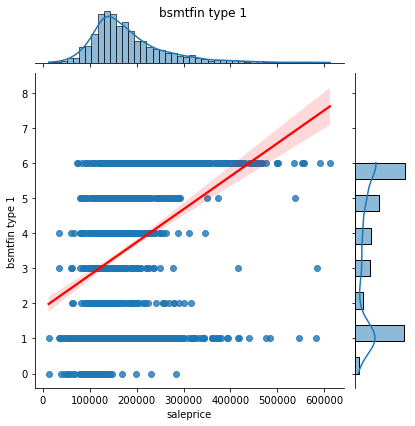

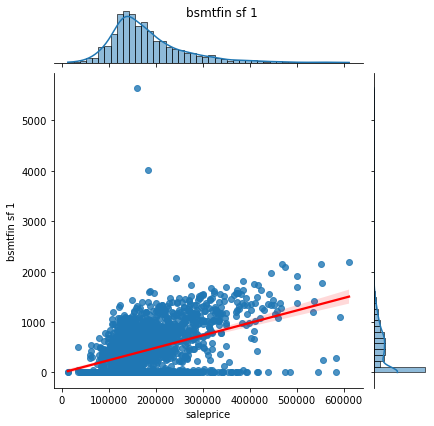

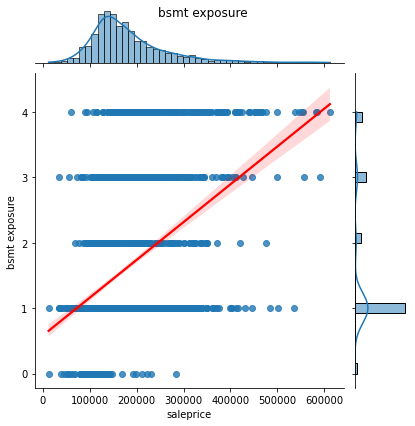

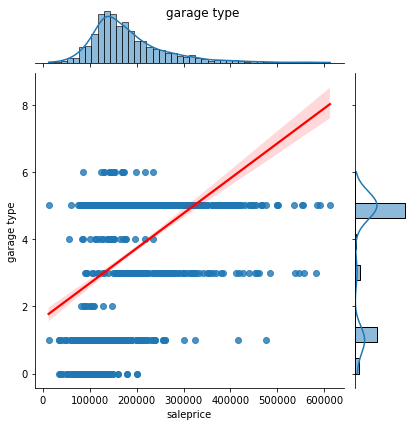

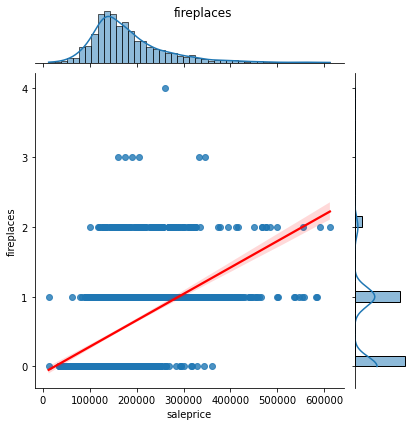

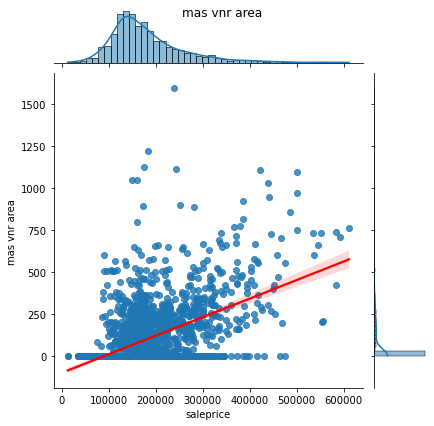

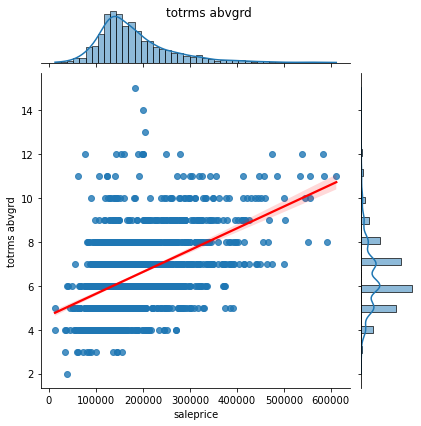

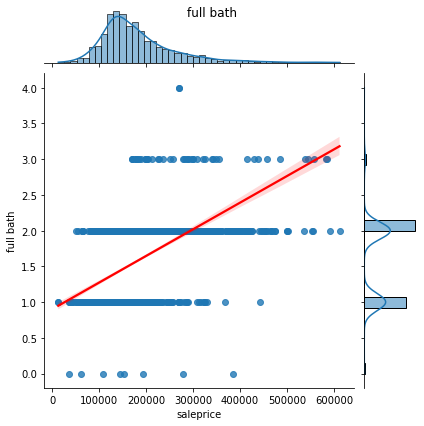

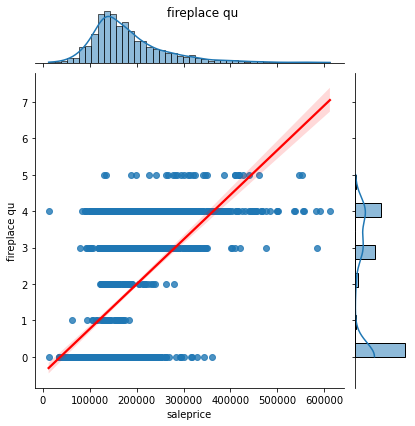

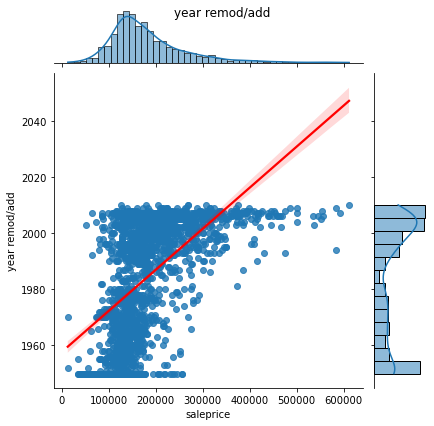

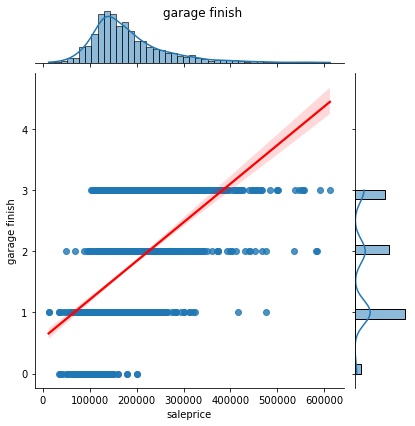

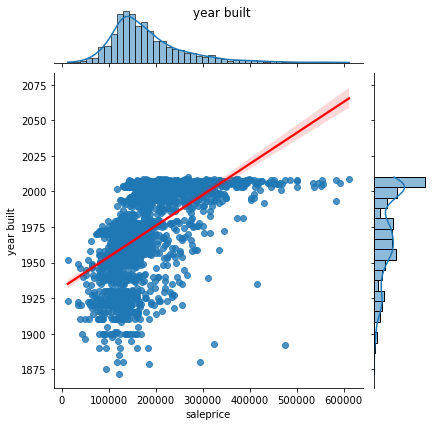

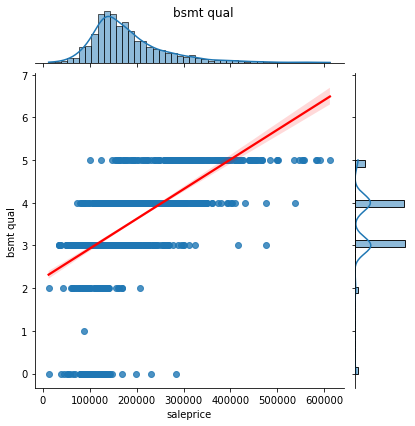

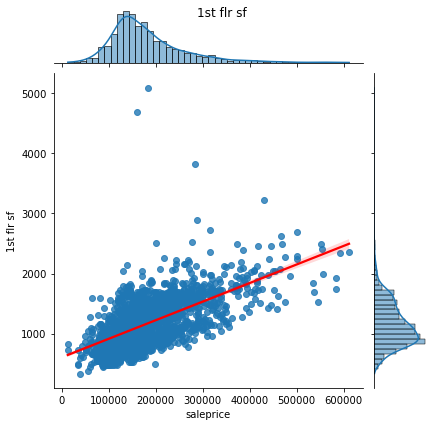

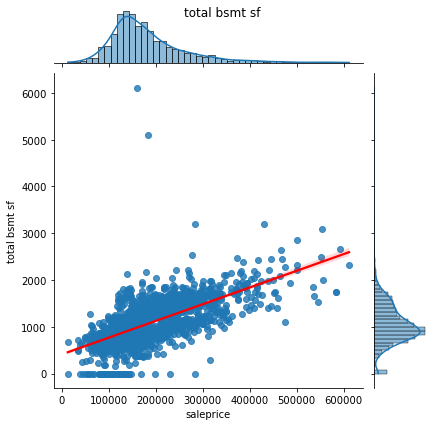

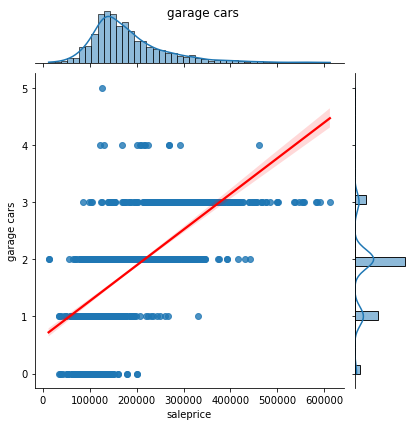

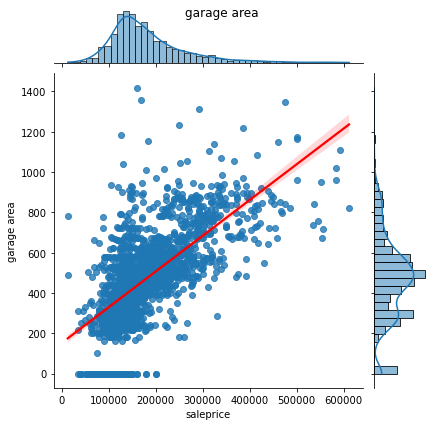

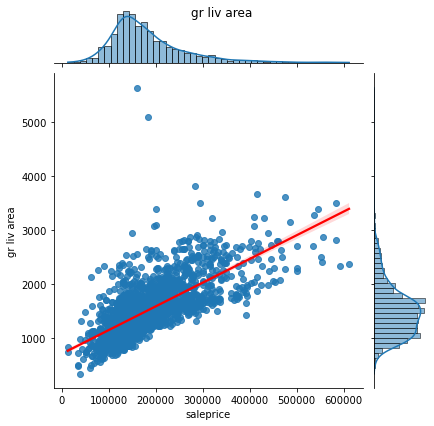

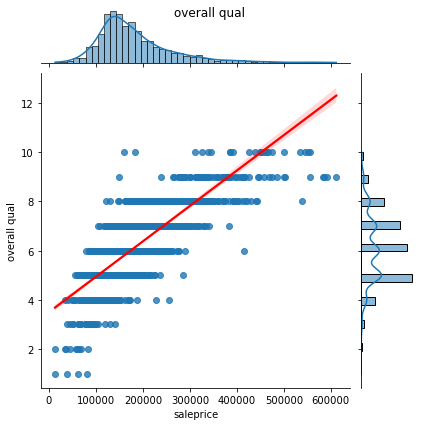

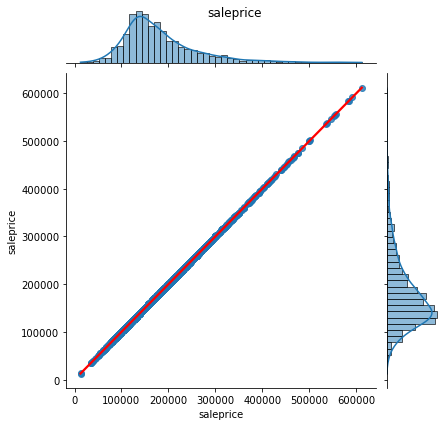

In [68]:
for feature in corrs.iterrows():
    #print(feature[0])
    #sns.jointplot(data=df_train, x="saleprice", y=feature[0], kind="reg", color='r')
    p = sns.jointplot(data=df_train, x="saleprice", y=feature[0], kind='reg', 
              line_kws={"color": "red"});
    p.fig.suptitle(feature[0])

# with help from 
# https://stackoverflow.com/questions/16476924/how-to-iterate-over-rows-in-a-dataframe-in-pandas
# https://stackoverflow.com/questions/48145924/different-colors-for-points-and-line-in-seaborn-regplot


In [69]:
def find_outliers(col):
    q1 = np.percentile(df_train[col], 25)  # Find the first quartile
    q3 = np.percentile(df_train[col], 75)  # Find the third quartile
    iqr = q3 - q1                          # Calculate the IQR
             # The normal lower limit is Q1 – (1.5 * IQR)
             # THe normal upper limit as Q3 + (1.5 * IQR)
    lowerbound = q1 - 1.5 * iqr            # lower bound 
    upperbound = q3 + 1.5 * iqr            # Upper bound 
    
    return f'For {col}: below {lowerbound} or above {upperbound} is an outlier.'

for feature in corrs.head(10).iterrows():
    print(find_outliers(feature[0]))

For pid: below -39624770.0 or above 1475262990.0 is an outlier.
For fence: below 0.0 or above 0.0 is an outlier.
For enclosed porch: below 0.0 or above 0.0 is an outlier.
For kitchen abvgr: below 1.0 or above 1.0 is an outlier.
For overall cond: below 3.5 or above 7.5 is an outlier.
For ms subclass: below -55.0 or above 145.0 is an outlier.
For id: below -1413.25 or above 4364.75 is an outlier.
For misc feature: below 0.0 or above 0.0 is an outlier.
For bsmt half bath: below 0.0 or above 0.0 is an outlier.
For low qual fin sf: below 0.0 or above 0.0 is an outlier.


C:\Users\benro\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:218: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


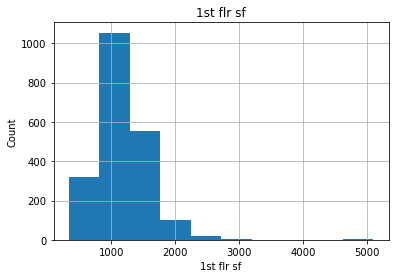

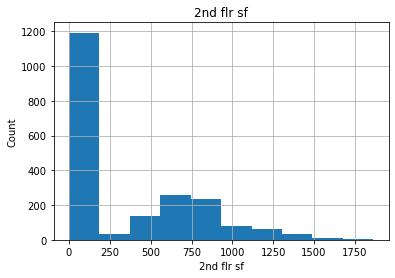

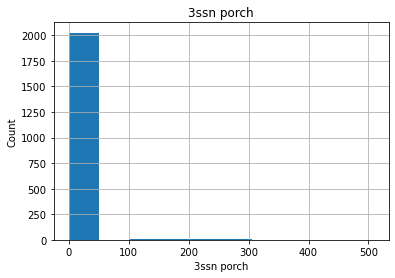

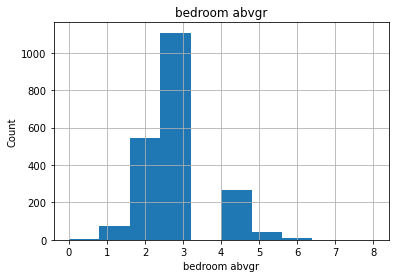

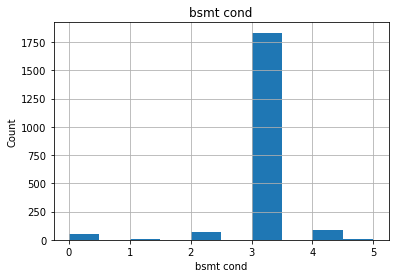

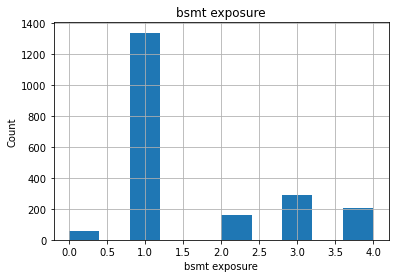

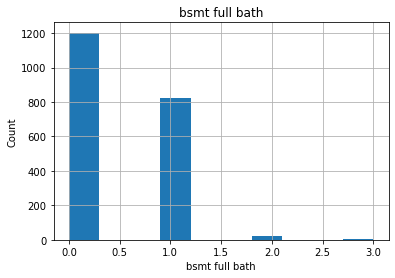

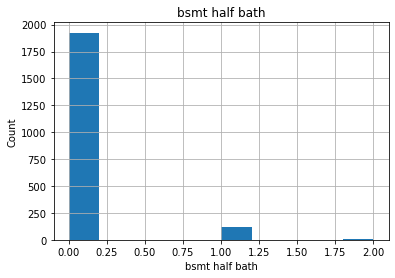

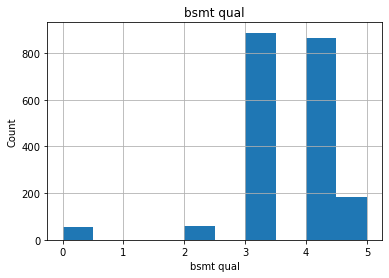

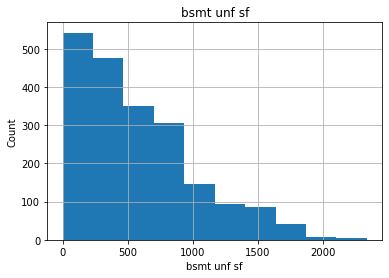

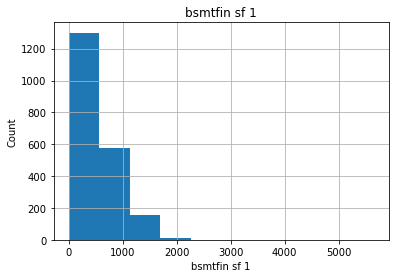

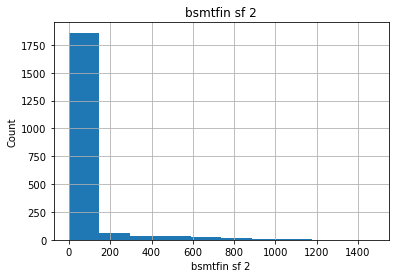

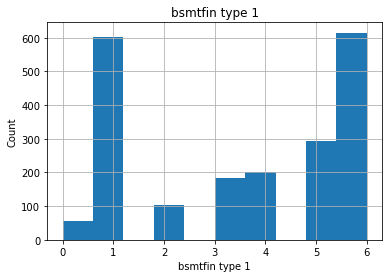

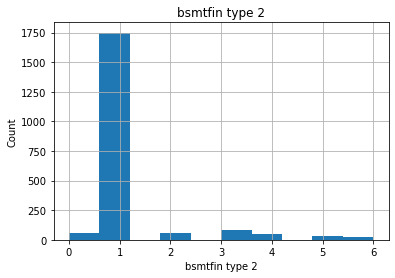

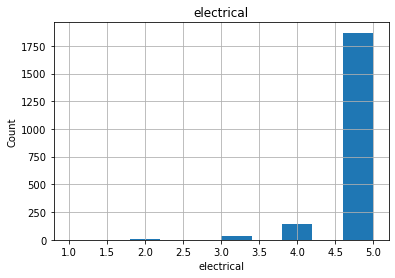

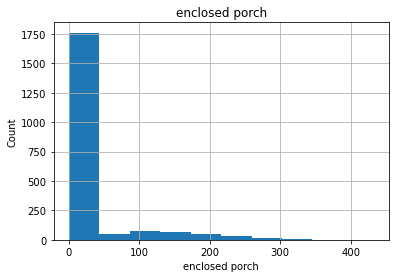

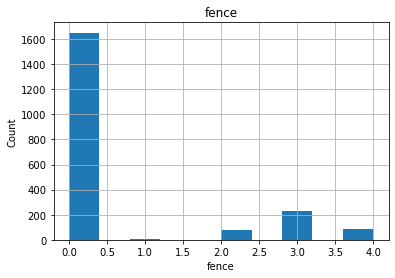

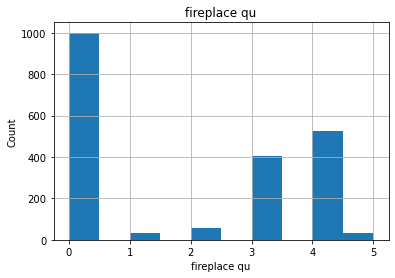

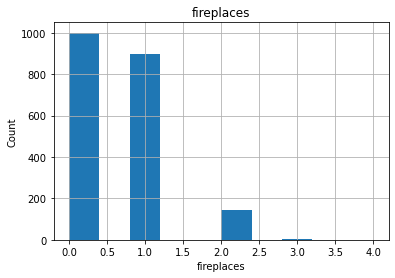

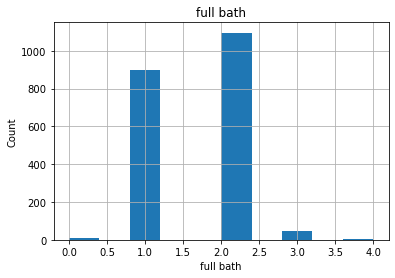

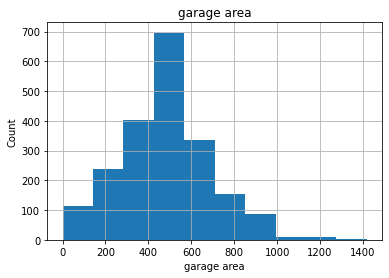

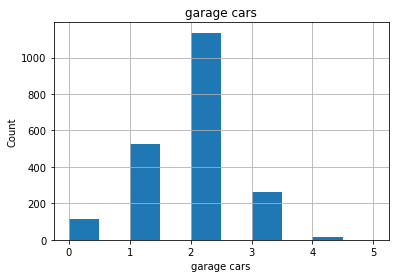

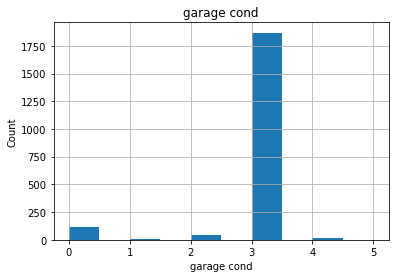

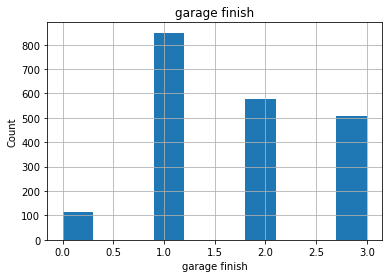

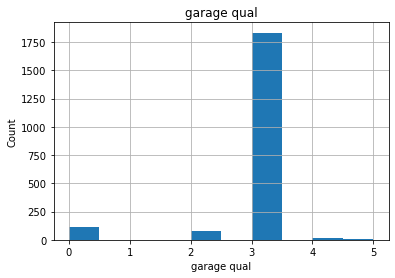

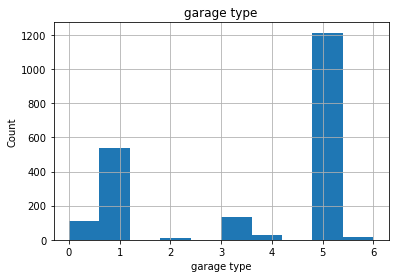

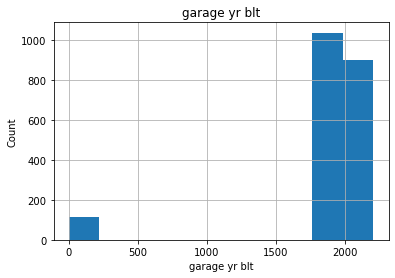

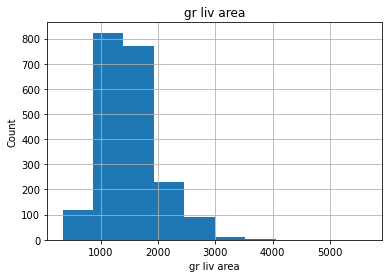

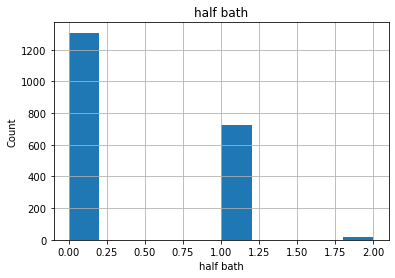

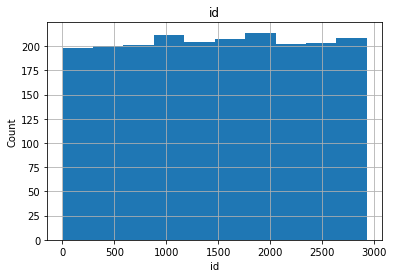

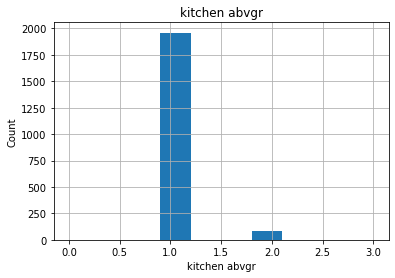

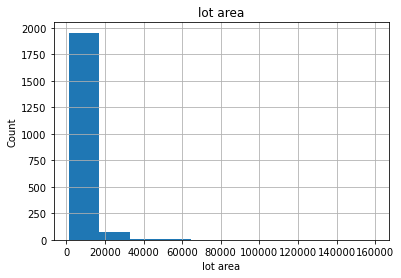

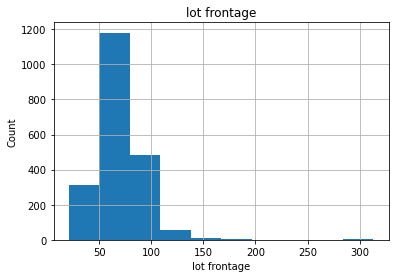

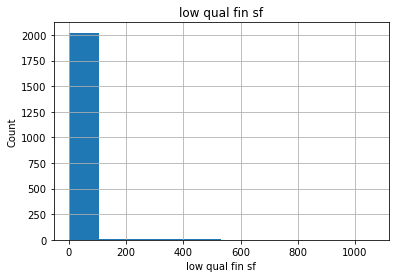

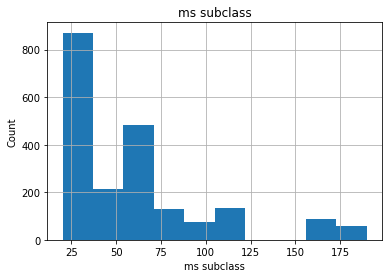

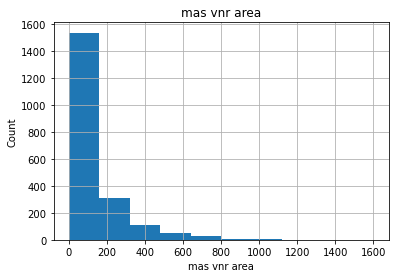

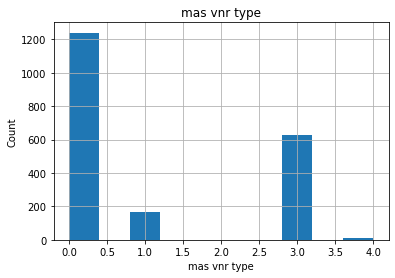

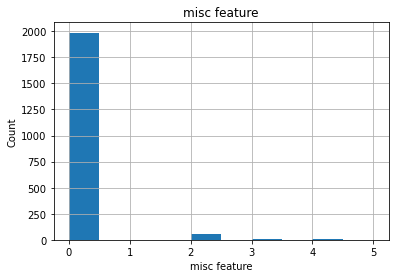

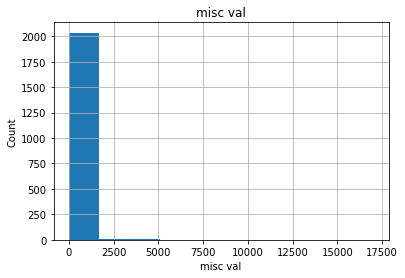

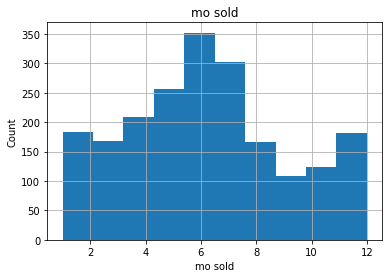

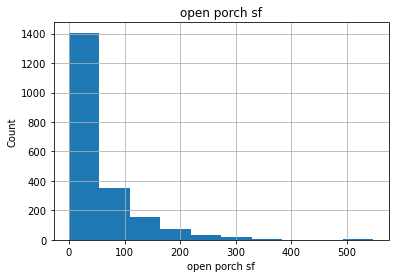

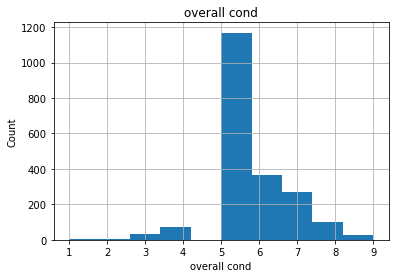

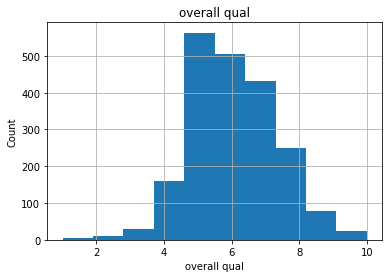

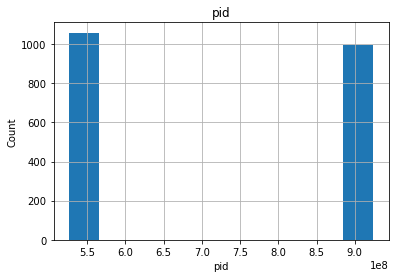

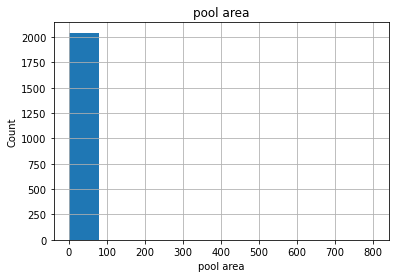

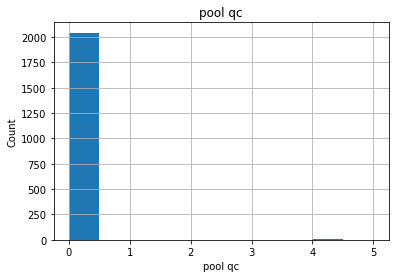

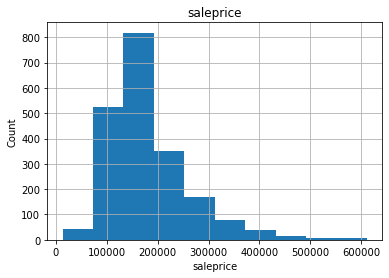

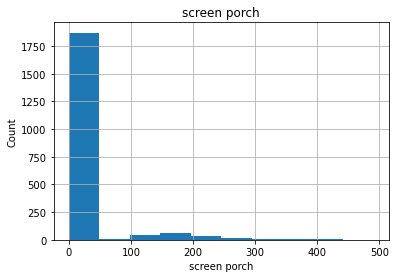

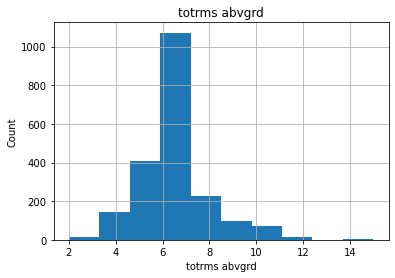

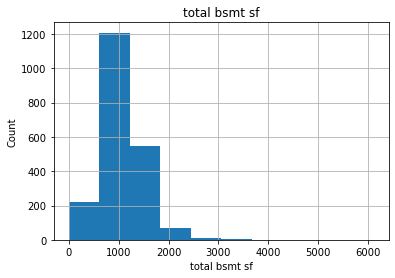

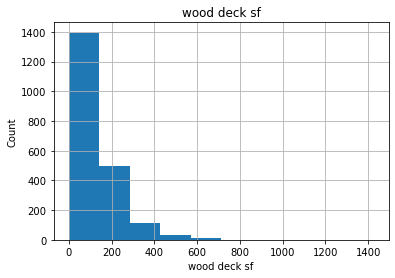

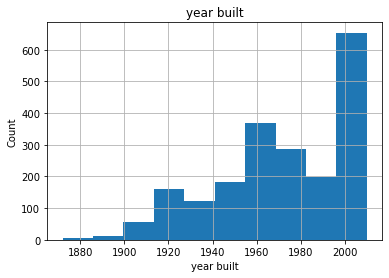

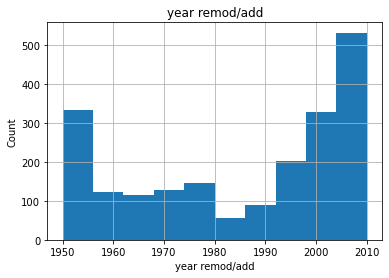

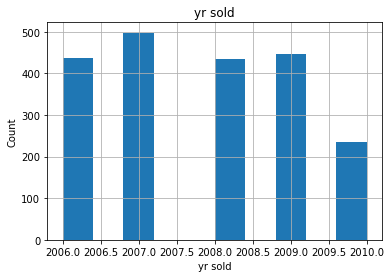

In [70]:
for col in df_train.select_dtypes(include=np.number):
    df_train.hist(column=col)
    plt.xlabel(col)
    plt.ylabel('Count');

#with help from https://pythonexamples.org/pandas-dataframe-select-columns-of-numeric-datatype/
# df.select_dtypes(include='number')

In [71]:
df_train.head()

,1st flr sf,2nd flr sf,3ssn porch,alley,bedroom abvgr,bldg type,bsmt cond,bsmt exposure,bsmt full bath,bsmt half bath,bsmt qual,bsmt unf sf,bsmtfin sf 1,bsmtfin sf 2,bsmtfin type 1,bsmtfin type 2,central air,condition 1,condition 2,electrical,enclosed porch,exter cond,exter qual,exterior 1st,exterior 2nd,fence,fireplace qu,fireplaces,foundation,full bath,functional,garage area,garage cars,garage cond,garage finish,garage qual,garage type,garage yr blt,gr liv area,half bath,heating,heating qc,house style,id,kitchen abvgr,kitchen qual,land contour,land slope,lot area,lot config,lot frontage,lot shape,low qual fin sf,ms subclass,ms zoning,mas vnr area,mas vnr type,misc feature,misc val,mo sold,neighborhood,open porch sf,overall cond,overall qual,pid,paved drive,pool area,pool qc,roof matl,roof style,sale type,saleprice,screen porch,street,totrms abvgrd,total bsmt sf,utilities,wood deck sf,year built,year remod/add,yr sold
0,725,754,0,NA,3,1Fam,3,1,0.0,0.0,3,192.0,533.0,0.0,6,1,Y,RRAe,Norm,5,0,TA,Gd,HdBoard,Plywood,0,0,0,CBlock,2,Typ,475.0,2.0,3,2,3,5,1976.0,1479,1,GasA,Ex,2Story,109,1,Gd,Lvl,Gtl,13517,CulDSac,55.228571,IR1,0,60,RL,289.0,3,0,0,3,Sawyer,44,8,6,533352170,Y,0,0,CompShg,Gable,WD,130500,0,Pave,6,725.0,AllPub,0,1976,2005,2010
1,913,1209,0,NA,4,1Fam,3,1,1.0,0.0,4,276.0,637.0,0.0,6,1,Y,Norm,Norm,5,0,TA,Gd,VinylSd,VinylSd,0,3,1,PConc,2,Typ,559.0,2.0,3,2,3,5,1997.0,2122,1,GasA,Ex,2Story,544,1,Gd,Lvl,Gtl,11492,CulDSac,43.000000,IR1,0,60,RL,132.0,3,0,0,4,SawyerW,74,5,7,531379050,Y,0,0,CompShg,Gable,WD,220000,0,Pave,8,913.0,AllPub,0,1996,1997,2009
2,1057,0,0,NA,3,1Fam,3,1,1.0,0.0,3,326.0,731.0,0.0,6,1,Y,Norm,Norm,5,0,Gd,TA,VinylSd,VinylSd,0,0,0,CBlock,1,Typ,246.0,1.0,3,1,3,1,1953.0,1057,0,GasA,TA,1Story,153,1,Gd,Lvl,Gtl,7922,Inside,68.000000,Reg,0,20,RL,0.0,0,0,0,1,NAmes,52,7,5,535304180,Y,0,0,CompShg,Gable,WD,109000,0,Pave,5,1057.0,AllPub,0,1953,2007,2010
3,744,700,0,NA,3,1Fam,3,1,0.0,0.0,4,384.0,0.0,0.0,1,1,Y,Norm,Norm,5,0,TA,TA,VinylSd,VinylSd,0,0,0,PConc,2,Typ,400.0,2.0,3,3,3,3,2007.0,1444,1,GasA,Gd,2Story,318,1,TA,Lvl,Gtl,9802,Inside,73.000000,Reg,0,60,RL,0.0,0,0,0,4,Timber,0,5,5,916386060,Y,0,0,CompShg,Gable,WD,174000,0,Pave,7,384.0,AllPub,100,2006,2007,2010
4,831,614,0,NA,3,1Fam,4,1,0.0,0.0,2,676.0,0.0,0.0,1,1,Y,Norm,Norm,5,0,TA,TA,Wd Sdng,Plywood,0,0,0,PConc,2,Typ,484.0,2.0,3,1,3,1,1957.0,1445,0,GasA,TA,1.5Fin,255,1,TA,Lvl,Gtl,14235,Inside,82.000000,IR1,0,50,RL,0.0,0,0,0,3,SawyerW,59,8,6,906425045,N,0,0,CompShg,Gable,WD,138500,0,Pave,6,676.0,AllPub,0,1900,1993,2010


In [72]:
features = [
    'saleprice',
    'overall qual',
    'gr liv area',
#    'garage area',
#    'garage cars',
#    'total bsmt sf',
    '1st flr sf',
#    'bsmt qual',
    'year built',
    'garage finish',
    'year remod/add',
    'fireplaces',
    'lot area',
    '2nd flr sf',
    'fence'
]

In [73]:
hotfeatures = [
    'saleprice',
    'overall qual',
    'gr liv area',
    'garage area',
    'total bsmt sf',
    '1st flr sf',
    'bsmt qual',
    'year built',
]



In [74]:
coldfeatures = [
    'saleprice',
    'fence',
    'enclosed porch',
    'kitchen abvgr',
    'ms subclass',
    'misc feature',
    'bsmt half bath',
    'bsmtfin type 2'
]

Text(0.5, 0.98, 'Correlations')

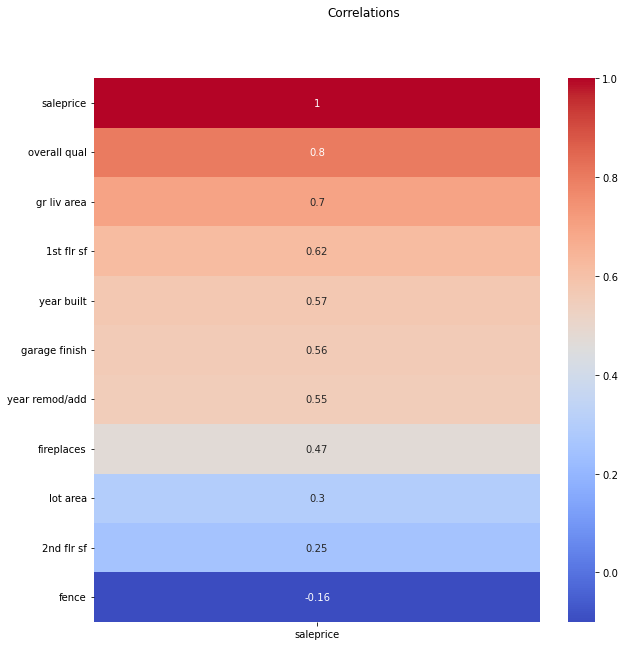

In [75]:
# Total Correlations
plt.figure(figsize=(10,10))

sns.heatmap(df_train[features].corr()[['saleprice']].sort_values(by='saleprice', ascending=False), annot=True,
            cmap='coolwarm',
            vmin=-.1, 
            vmax=1) 

plt.suptitle('Correlations')

Text(0.5, 0.98, 'Look for these')

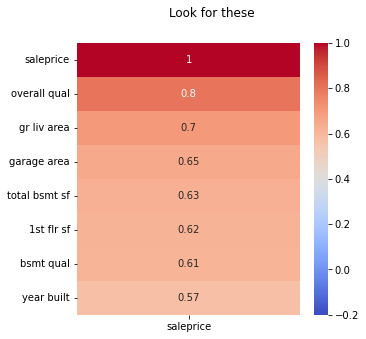

In [76]:
# Hot Correlations
plt.figure(figsize=(5,5))

sns.heatmap(df_train[hotfeatures].corr()[['saleprice']].sort_values(by='saleprice', ascending=False), annot=True,
            cmap='coolwarm',
            vmin=-.2, 
            vmax=1) 

plt.suptitle('Look for these')

Text(0.5, 0.98, 'Ignore these')

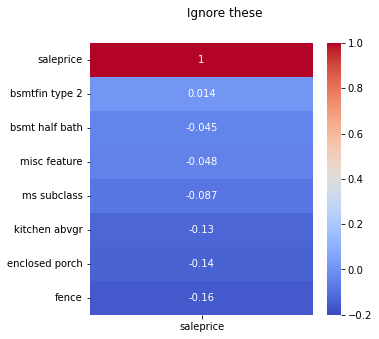

In [77]:
# Cold Correlations
plt.figure(figsize=(5,5))

sns.heatmap(df_train[coldfeatures].corr()[['saleprice']].sort_values(by='saleprice', ascending=False), annot=True,
            cmap='coolwarm',
            vmin=-.2, 
            vmax=1) 

plt.suptitle('Ignore these')

<AxesSubplot:>

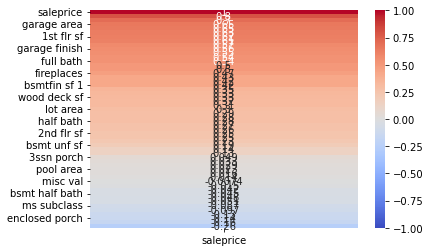

In [78]:
sns.heatmap(df_train.corr()[['saleprice']].sort_values('saleprice', ascending=False),
            annot=True,
            cmap='coolwarm',
            vmin=-1, 
            vmax=1)

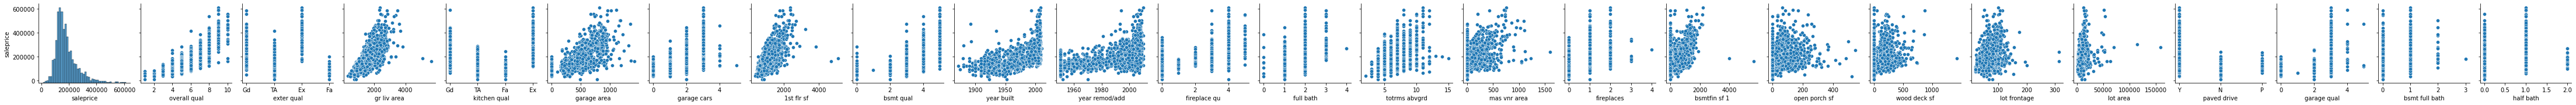

In [79]:
sns.pairplot(df_train, x_vars=[
    'saleprice','overall qual','exter qual',
    'gr liv area','kitchen qual','garage area',
    'garage cars','1st flr sf','bsmt qual',
    'year built','year remod/add','fireplace qu',
    'full bath','totrms abvgrd','mas vnr area',
    'fireplaces','bsmtfin sf 1','open porch sf',
    'wood deck sf','lot frontage','lot area',
    'paved drive','garage qual','bsmt full bath','half bath'], y_vars=['saleprice'])   # specifying axis
# apps is out target so thats why we're looking at it

In [81]:
df_train.head()

,1st flr sf,2nd flr sf,3ssn porch,alley,bedroom abvgr,bldg type,bsmt cond,bsmt exposure,bsmt full bath,bsmt half bath,bsmt qual,bsmt unf sf,bsmtfin sf 1,bsmtfin sf 2,bsmtfin type 1,bsmtfin type 2,central air,condition 1,condition 2,electrical,enclosed porch,exter cond,exter qual,exterior 1st,exterior 2nd,fence,fireplace qu,fireplaces,foundation,full bath,functional,garage area,garage cars,garage cond,garage finish,garage qual,garage type,garage yr blt,gr liv area,half bath,heating,heating qc,house style,id,kitchen abvgr,kitchen qual,land contour,land slope,lot area,lot config,lot frontage,lot shape,low qual fin sf,ms subclass,ms zoning,mas vnr area,mas vnr type,misc feature,misc val,mo sold,neighborhood,open porch sf,overall cond,overall qual,pid,paved drive,pool area,pool qc,roof matl,roof style,sale type,saleprice,screen porch,street,totrms abvgrd,total bsmt sf,utilities,wood deck sf,year built,year remod/add,yr sold
0,725,754,0,NA,3,1Fam,3,1,0.0,0.0,3,192.0,533.0,0.0,6,1,Y,RRAe,Norm,5,0,TA,Gd,HdBoard,Plywood,0,0,0,CBlock,2,Typ,475.0,2.0,3,2,3,5,1976.0,1479,1,GasA,Ex,2Story,109,1,Gd,Lvl,Gtl,13517,CulDSac,55.228571,IR1,0,60,RL,289.0,3,0,0,3,Sawyer,44,8,6,533352170,Y,0,0,CompShg,Gable,WD,130500,0,Pave,6,725.0,AllPub,0,1976,2005,2010
1,913,1209,0,NA,4,1Fam,3,1,1.0,0.0,4,276.0,637.0,0.0,6,1,Y,Norm,Norm,5,0,TA,Gd,VinylSd,VinylSd,0,3,1,PConc,2,Typ,559.0,2.0,3,2,3,5,1997.0,2122,1,GasA,Ex,2Story,544,1,Gd,Lvl,Gtl,11492,CulDSac,43.000000,IR1,0,60,RL,132.0,3,0,0,4,SawyerW,74,5,7,531379050,Y,0,0,CompShg,Gable,WD,220000,0,Pave,8,913.0,AllPub,0,1996,1997,2009
2,1057,0,0,NA,3,1Fam,3,1,1.0,0.0,3,326.0,731.0,0.0,6,1,Y,Norm,Norm,5,0,Gd,TA,VinylSd,VinylSd,0,0,0,CBlock,1,Typ,246.0,1.0,3,1,3,1,1953.0,1057,0,GasA,TA,1Story,153,1,Gd,Lvl,Gtl,7922,Inside,68.000000,Reg,0,20,RL,0.0,0,0,0,1,NAmes,52,7,5,535304180,Y,0,0,CompShg,Gable,WD,109000,0,Pave,5,1057.0,AllPub,0,1953,2007,2010
3,744,700,0,NA,3,1Fam,3,1,0.0,0.0,4,384.0,0.0,0.0,1,1,Y,Norm,Norm,5,0,TA,TA,VinylSd,VinylSd,0,0,0,PConc,2,Typ,400.0,2.0,3,3,3,3,2007.0,1444,1,GasA,Gd,2Story,318,1,TA,Lvl,Gtl,9802,Inside,73.000000,Reg,0,60,RL,0.0,0,0,0,4,Timber,0,5,5,916386060,Y,0,0,CompShg,Gable,WD,174000,0,Pave,7,384.0,AllPub,100,2006,2007,2010
4,831,614,0,NA,3,1Fam,4,1,0.0,0.0,2,676.0,0.0,0.0,1,1,Y,Norm,Norm,5,0,TA,TA,Wd Sdng,Plywood,0,0,0,PConc,2,Typ,484.0,2.0,3,1,3,1,1957.0,1445,0,GasA,TA,1.5Fin,255,1,TA,Lvl,Gtl,14235,Inside,82.000000,IR1,0,50,RL,0.0,0,0,0,3,SawyerW,59,8,6,906425045,N,0,0,CompShg,Gable,WD,138500,0,Pave,6,676.0,AllPub,0,1900,1993,2010


In [82]:
# df_train['bsmt cond'] * df_train['bsmt exposure']
#     df_train['bsmt full bath']
#     df_train['bsmt qual']
#     df_train['bsmt unf sf']
#     df_train['bsmtfin sf 1']
#     df_train['bsmtfin sf 2']

In [83]:
# df_train['garage area * df_train['garage cars']
#     df_train['garage cond']
#     df_train['garage finish']
#     df_train['garage qual']

In [84]:
# df_train['land slope * df_train['lot shape']
#     df_train['lot area']
#     df_train['lot frontage']

In [87]:
df_corr_test = df_train
df_corr_test.dtypes

1st flr sf           int64
2nd flr sf           int64
3ssn porch           int64
alley               object
bedroom abvgr        int64
bldg type           object
bsmt cond            int64
bsmt exposure        int64
bsmt full bath     float64
bsmt half bath     float64
bsmt qual            int64
bsmt unf sf        float64
bsmtfin sf 1       float64
bsmtfin sf 2       float64
bsmtfin type 1       int64
bsmtfin type 2       int64
central air         object
condition 1         object
condition 2         object
electrical           int64
enclosed porch       int64
exter cond          object
exter qual          object
exterior 1st        object
exterior 2nd        object
fence                int64
fireplace qu         int64
fireplaces           int64
foundation          object
full bath            int64
functional          object
garage area        float64
garage cars        float64
garage cond          int64
garage finish        int64
garage qual          int64
garage type          int64
g

In [88]:
df_train['gr liv area']
df_train['bsmt qual']
df_train['overall qual']
df_train['exter qual']
df_train['garage area']
df_train['garage cars']
df_train['garage yr blt']
df_train['kitchen qual']
df_train['year built']
df_train['year remod/add']
df_train['yr sold']



df_train['gr liv area'] * df_train['bsmt qual']
df_train['overall qual'] * df_train['bsmt qual']
df_train['gr liv area'] * df_train['exter qual']
df_train['overall qual'] * df_train['exter qual']
df_train['overall qual'] * df_train['garage area']
df_train['overall qual'] * df_train['garage cars']
df_train['overall qual'] * df_train['garage yr blt']
df_train['kitchen qual'] * df_train['gr liv area'] 
df_train['overall qual'] * df_train['gr liv area'] 
df_train['overall qual'] * df_train['kitchen qual'] 
df_train['year built'] * df_train['overall qual']
df_train['year remod/add'] * df_train['overall qual']
df_train['yr sold'] * df_train['overall qual']



0       12060
1       14063
2       10050
3       10050
4       12060
        ...  
2046    16064
2047     8036
2048    12054
2049     8036
2050    14070
Length: 2051, dtype: int64

In [89]:
df_train['gr liv area']
df_train['bsmt qual']
df_train['overall qual']
df_train['exter qual']
df_train['garage area']
df_train['garage cars']
df_train['garage yr blt']
df_train['kitchen qual']
df_train['year built']
df_train['year remod/add']
df_train['yr sold']

0       2010
1       2009
2       2010
3       2010
4       2010
        ... 
2046    2008
2047    2009
2048    2009
2049    2009
2050    2010
Name: yr sold, Length: 2051, dtype: int64

In [90]:
df_train.agg([min,'mean',max])   # looking for potential outliers, maybe there is a better way?
#  with help from https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.agg.html  

,1st flr sf,2nd flr sf,3ssn porch,alley,bedroom abvgr,bldg type,bsmt cond,bsmt exposure,bsmt full bath,bsmt half bath,bsmt qual,bsmt unf sf,bsmtfin sf 1,bsmtfin sf 2,bsmtfin type 1,bsmtfin type 2,central air,condition 1,condition 2,electrical,enclosed porch,exter cond,exter qual,exterior 1st,exterior 2nd,fence,fireplace qu,fireplaces,foundation,full bath,functional,garage area,garage cars,garage cond,garage finish,garage qual,garage type,garage yr blt,gr liv area,half bath,heating,heating qc,house style,id,kitchen abvgr,kitchen qual,land contour,land slope,lot area,lot config,lot frontage,lot shape,low qual fin sf,ms subclass,ms zoning,mas vnr area,mas vnr type,misc feature,misc val,mo sold,neighborhood,open porch sf,overall cond,overall qual,pid,paved drive,pool area,pool qc,roof matl,roof style,sale type,saleprice,screen porch,street,totrms abvgrd,total bsmt sf,utilities,wood deck sf,year built,year remod/add,yr sold,test
min,334.000000,0.000000,0.000000,Grvl,0.000000,1Fam,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,N,Artery,Artery,1.000000,0.000000,Ex,Ex,AsbShng,AsbShng,0.000000,0.00000,0.000000,BrkTil,0.000000,Maj1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,GasA,Ex,1.5Fin,1.000000,0.000000,Ex,Bnk,Gtl,1300.000000,Corner,21.000000,IR1,0.000000,20.000000,A (agr),0.000000,0.000000,0.000000,0.000000,1.000000,Blmngtn,0.000000,1.000000,1.00000,5.263011e+08,N,0.000000,0.000000,ClyTile,Flat,COD,12789.000000,0.000000,Grvl,2.000000,0.000000,AllPub,0.00000,1872.000000,1950.000000,2006.000000,GrvlGrvlGrvlGrvlGrvlGrvlGrvlGrvlGrvlGrvlGrvlGr...
mean,1164.488055,329.329108,2.591419,NaN,2.843491,NaN,2.929303,1.628961,0.427109,0.063384,3.490005,567.451487,442.084837,47.935641,3.564603,1.2745,NaN,NaN,NaN,4.885422,22.571916,NaN,NaN,NaN,NaN,0.576792,1.76353,0.590931,NaN,1.577279,NaN,473.440761,1.775719,2.810336,1.723062,2.803023,3.530473,1868.725987,1499.330083,0.371039,NaN,NaN,NaN,1474.033642,1.042906,NaN,NaN,NaN,10065.208191,NaN,68.877439,NaN,5.512921,57.008776,NaN,98.626524,1.028766,0.069722,51.574354,6.219893,NaN,47.556802,5.562165,6.11214,7.135900e+08,NaN,2.397855,0.015115,NaN,NaN,NaN,181469.701609,16.511458,NaN,6.435885,1057.471965,NaN,93.83374,1971.708922,1984.190151,2007.775719,NaN
max,5095.000000,1862.000000,508.000000,Pave,8.000000,TwnhsE,5.000000,4.000000,3.000000,2.000000,5.000000,2336.000000,5644.000000,1474.000000,6.000000,6.0000,Y,RRNn,RRNn,5.000000,432.000000,TA,TA,WdShing,Wd Shng,4.000000,5.00000,4.000000,Wood,4.000000,Typ,1418.000000,5.000000,5.000000,3.000000,5.000000,6.000000,2207.000000,5642.000000,2.000000,Wall,TA,SLvl,2930.000000,3.000000,TA,Lvl,Sev,159000.000000,Inside,313.000000,Reg,1064.000000,190.000000,RM,1600.000000,4.000000,5.000000,17000.000000,12.000000,Veenker,547.000000,9.000000,10.00000,9.241520e+08,Y,800.000000,5.000000,WdShngl,Shed,WD,611657.000000,490.000000,Pave,15.000000,6110.000000,NoSewr,1424.00000,2010.000000,2010.000000,2010.000000,PavePavePavePavePavePavePavePavePavePavePavePa...
